# **Scatter Plot**

Bu görselleştirmede 2014, 2015 ve 2016 yıllarındaki dünya sıralamasındaki ilk 100 üniversitenin alıntıları karşılaştırılacaktır.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade plotly 

In [ ]:
!pip install jupyter-dash

In [12]:
timesData = pd.read_csv("/content/drive/MyDrive/data/timesData.csv")

In [13]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


Plotly'da bir kalıp vardır. Bu kalıp doğrultusunda görselleştirme yapılır.

kullanılan kalıp;

**trace** kısmı oluşturulurken

*   **x** = x eksenine koyulacak sütun yazılır.
*   **y** = x eksenine koyulacak sütun yazılır.
*   **mode** = kullanılacak plotun türüdür.
*   **name** = trace'in adıdır, kenarda hangi renkte hangi verinin kullanıldığının bilgisini verir.
*   **marker** = dictionarylerle birlikte kullanılır, renk ve saydamlık belirlenir.
*   **text** = plotun üzerinde gezinirken değerin ait olduğu bilgidir.

**data** = traceler eklendiği listedir.

**layout** = dictionarydir ve içerisinde şunları barındırır;
*   **title** = başlık bilgisi
*   **x axis** = bir dictionarydir ve içerisinde şunları barındırır;
  *   **title** = x ekseninin adı
  *   **ticklen** = x eksenindeki başlığın kalınlığı
  *   **zeroline** = False olduğunda sıfırdan geçen çizgiler devre dışı bırakılır.

**fig** = datayı ve layoutu içeren bir figür oluşturulur.

**iplot()** = içerisinde data ve layout bulunan figür plot edilir.














In [14]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:] #timesData'daki 2014 yılındaki ilk 100 üniversiteden bir filtre oluşturulup,bu filtre dataya uygulanır.
df2015 = timesData[timesData.year == 2015].iloc[:100,:] #timesData'daki 2015 yılındaki ilk 100 üniversiteden bir filtre oluşturulup,bu filtre dataya uygulanır.
df2016 = timesData[timesData.year == 2016].iloc[:100,:] #timesData'daki 2016 yılındaki ilk 100 üniversiteden bir filtre oluşturulup,bu filtre dataya uygulanır.

In [15]:
# creating trace1 -> 2014,2015 ve 2016 olmak üzere üç farklı data olduğundan 3 farklı trace yaratılacaktır.
trace1 =go.Scatter( #scatter türü seçilir.
                    x = df2014.world_rank, #x eksenine 2014 yılındaki ilk 100 üniversite koyulur.
                    y = df2014.citations,  #y eksenine 2014 yılındaki alıntı değerleri koyulur.
                    mode = "markers",      #marker modu seçilir, yani nokta şekli
                    name = "2014",         #trace'in adı verilir.
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'), #renk ve saydamlık verilir.
                    text= df2014.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.

# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank, #x eksenine 2015 yılındaki ilk 100 üniversite koyulur.
                    y = df2015.citations,  #y eksenine 2015 yılındaki alıntı değerleri koyulur.
                    mode = "markers",      #marker modu seçilir, yani nokta şekli
                    name = "2015",         #trace'in adı verilir.
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),  #renk ve saydamlık verilir.
                    text= df2015.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.

# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank, #x eksenine 2016 yılındaki ilk 100 üniversite koyulur.
                    y = df2016.citations,  #y eksenine 2016 yılındaki alıntı değerleri koyulur.
                    mode = "markers",      #marker modu seçilir, yani nokta şekli
                    name = "2016",         #trace'in adı verilir.
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),  #renk ve saydamlık verilir.
                    text= df2016.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.

data = [trace1, trace2, trace3]  #trace1, trace2 ve trace3 data değişkenine liste olarak atanır.

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)  #başlık, x ve y ekseninin bilgisi dictionary olarak layout değişkenine atanır.
             )
fig = dict(data = data, layout = layout)  #data parametresine data değişkeni, layout parametresine layout değişkeni atanarak figür oluşturulur.

iplot(fig) #figür plot edilir.

Github'da Ipython kernel olmadığı için pyplot görselleştirmeleri 
gözükmemektedir. Bu yüzden png formatında yüklenmiştir.

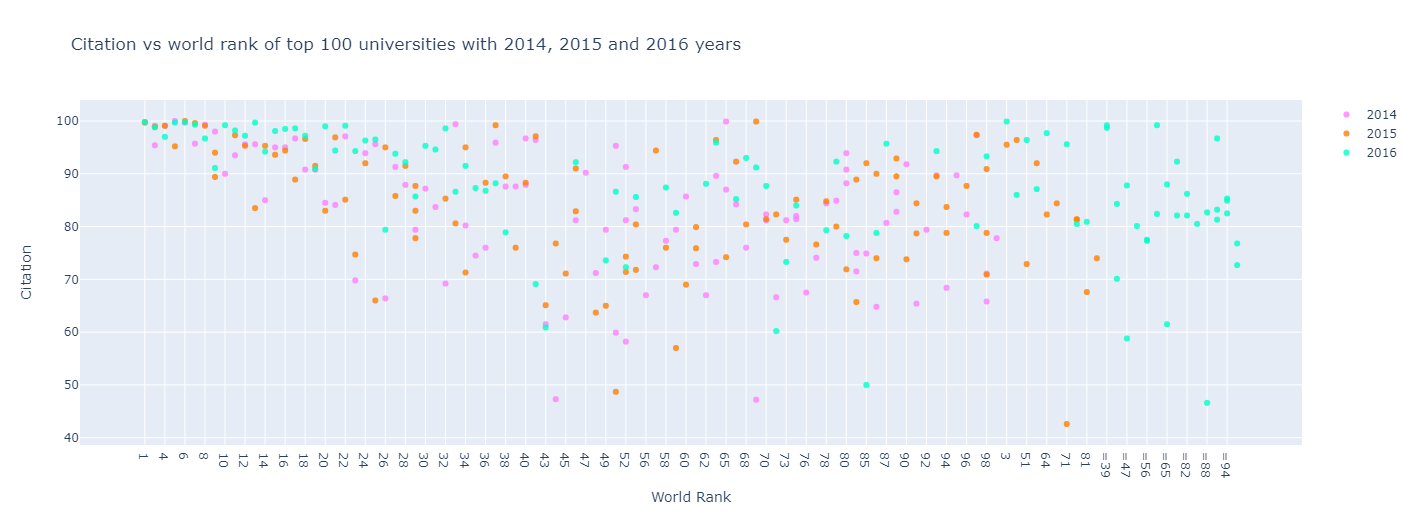

Plot yorumlandığında 2014 yılında Rice Üniversitesi 65. sırada alıntı değeri 99.9, 2015 yılında 69. sırada alıntı yapma değeri 99.9 olduğu görülür.

2014 yılında Ohio State Üniversitesi 59. sırada yer alırken alıntı değeri 79.4 olduğu gözükür. 2015 yılında 59. sırayı Kyoto Üniversitesi alırken alıntı değeri 57'dir. 2016 yılında ise 59. sırada Hong Kong Üniversitesi bulunurken alıntı değeri 82.6'dır.

In [16]:
# creating trace1 -> 2014,2015 ve 2016 olmak üzere üç farklı data olduğundan 3 farklı trace yaratılacaktır.
trace1 =go.Scatter( #scatter türü seçilir.
                    x = df2014.world_rank, #x eksenine 2014 yılındaki ilk 100 üniversite koyulur.
                    y = df2014.total_score,  #y eksenine 2014 yılındaki alıntı değerleri koyulur.
                    mode = "markers",      #marker modu seçilir, yani nokta şekli
                    name = "2014",         #trace'in adı verilir.
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'), #renk ve saydamlık verilir.
                    text= df2014.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.

# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank, #x eksenine 2015 yılındaki ilk 100 üniversite koyulur.
                    y = df2015.total_score,  #y eksenine 2015 yılındaki alıntı değerleri koyulur.
                    mode = "markers",      #marker modu seçilir, yani nokta şekli
                    name = "2015",         #trace'in adı verilir.
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),  #renk ve saydamlık verilir.
                    text= df2015.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.

# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank, #x eksenine 2016 yılındaki ilk 100 üniversite koyulur.
                    y = df2016.total_score,  #y eksenine 2016 yılındaki alıntı değerleri koyulur.
                    mode = "markers",      #marker modu seçilir, yani nokta şekli
                    name = "2016",         #trace'in adı verilir.
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),  #renk ve saydamlık verilir.
                    text= df2016.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.

data = [trace1, trace2, trace3]  #trace1, trace2 ve trace3 data değişkenine liste olarak atanır.

layout = dict(title = 'Total score vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Total Score',ticklen= 5,zeroline= False)  #başlık, x ve y ekseninin bilgisi dictionary olarak layout değişkenine atanır.
             )
fig = dict(data = data, layout = layout)  #data parametresine data değişkeni, layout parametresine layout değişkeni atanarak figür oluşturulur.

iplot(fig) #figür plot edilir.

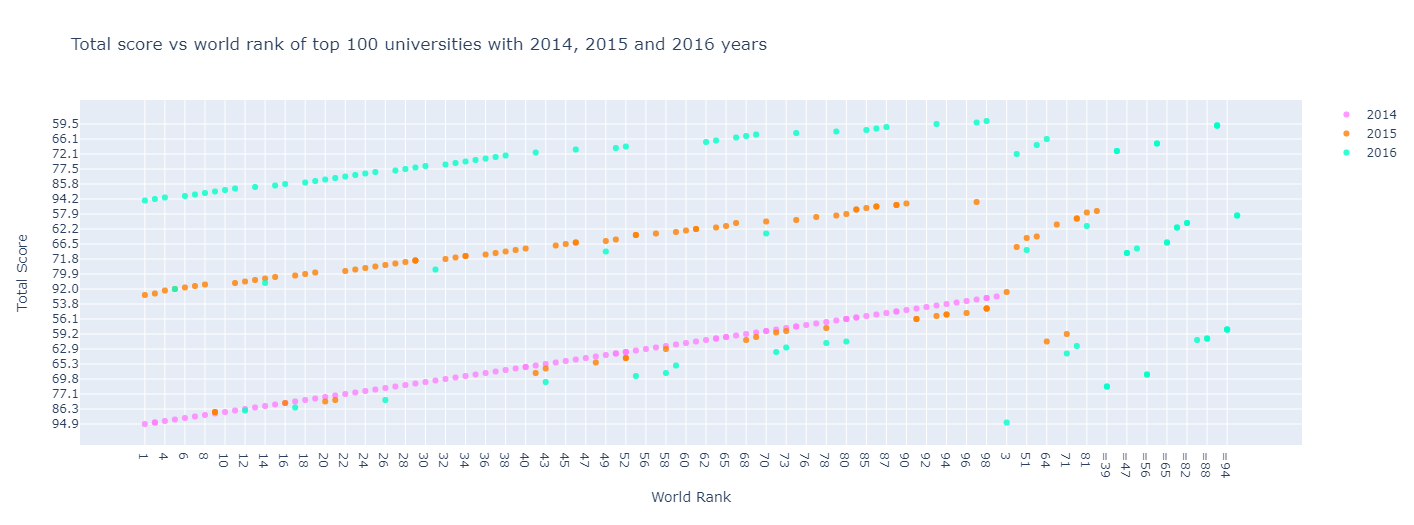

Üniversiteler 2014, 2015, 2016 yıllarındaki total_score'a yani gerçek sıralamalarına göre plot edilmiştir.